[IPython Notebook](mesh_wd.ipynb) |  [Python Script](mesh_wd.py)

Wilson-Devinney Style Meshing
============================

Setup
-----------------------------

In [1]:
%matplotlib inline

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.default_binary()

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Changing Meshing Options
--------------------------------

Next we need to add compute options and change the mesh_style for all stars from 'marching' to 'wd'

In [3]:
b.add_compute()

<ParameterSet: 16 parameters | components: primary, secondary>

In [4]:
b.set_value_all('mesh_method', 'wd')
# TODO: for now only the 'graham' eclipse algorithm supports wd-style meshes
b.set_value_all('eclipse_method', 'graham')

Adding Datasets
---------------------

Next let's add a mesh dataset so that we can plot our Wilson-Devinney style meshes

In [5]:
b.add_dataset('mesh', times=np.arange(0,3,0.5), dataset='mesh01')

<ParameterSet: 2 parameters | contexts: compute, dataset>

Running Compute
------------------

In [6]:
b.run_compute()

/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/eclipse.py:12: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  hull, inside = ceclipse.graham_scan_inside_hull(front[sa], back)
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/eclipse.py:12: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  hull, inside = ceclipse.graham_scan_inside_hull(front[sa], back)
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/eclipse.py:12: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  hull, inside = ceclipse.graham_scan_inside_hull(front[sa], back)
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/eclipse.py:12: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  hull, inside = ceclipse.graham_scan_inside_hull(front[sa], back)
/home/kyle/.local/lib/python2.7/site-packages/phoebe/backend/eclipse.py:12: DeprecationWarning: PyArray_FromDims: use PyArray_SimpleNew.
  hull, ins

<ParameterSet: 290 parameters | components: primary, secondary>

Plotting
---------------------

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


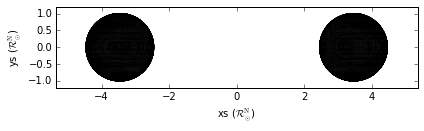

In [7]:
axs, artists = b['mesh01@model'].plot(time=0.5)

Now let's zoom in so we can see the layout of the triangles.  Note that Wilson-Devinney uses trapezoids, but since PHOEBE uses triangles, we take each of the trapezoids and split it into two triangles.

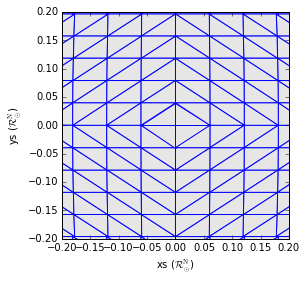

In [8]:
axs, artists = b['primary@mesh01@model'].plot(time=0.0, edgecolor='b', facecolor='0.9', xlim=(-0.2,0.2), ylim=(-0.2,0.2))

And now looking down from above.  Here you can see the gaps between the surface elements (and you can also see some of the subdivision that's taking place along the limb).

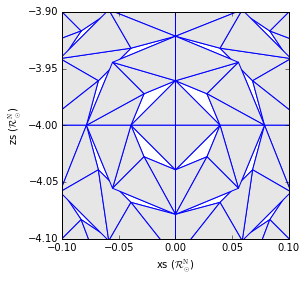

In [9]:
axs, artists = b['primary@mesh01@model'].plot(time=0.0, x='xs', y='zs', edgecolor='b', facecolor='0.9', xlim=(-0.1,0.1), ylim=(-4.1,-3.9))

And see which elements are visible at the current time.  This defaults to use the 'RdYlGn' colormap which will make visible elements green, partially hidden elements yellow, and hidden elements red.  Note that the observer is in the positive z-direction.

/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:242: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/home/kyle/.local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:242: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:


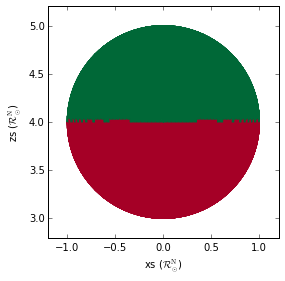

In [11]:
axs, artists = b['secondary@mesh01@model'].plot(time=0.0, x='xs', y='zs', edgecolor='None', facecolor='visibilities')